In this notebook, I intend to do the following:
- remove queries containing any weblinks (removed all queries with a dot (.) present)
- remove queries whose terms do not belong to the vocab set of the corpus

In [21]:
with open('./unique-queries-aol.txt', 'r') as f:
    unique_aol_queries = f.read().splitlines()

In [22]:
len(unique_aol_queries)

10154741

In [23]:
type(unique_aol_queries)

list

In [24]:
unique_aol_queries[500:510]

['how to do sign language',
 'www.commercebank.pc',
 'mandee broadway mall',
 'smartandfinalemployment',
 'decorator wrought iron table bases',
 'aol online call waiting',
 'ontario wineries',
 'nyti mes atrs',
 'riversidecommunitycollege',
 'spoon']

In [25]:
dot_clean_queries = [query for query in unique_aol_queries if '.' not in query]

In [26]:
len(dot_clean_queries)

7321967

In [27]:
dot_clean_queries[789:812]

['clap your hands say yeah lyrics',
 'family practioners in greenville tn',
 'hard drive partition',
 'myspaecom',
 'toys r us playgrouns',
 'brent wilkes',
 'inogen portable oxygen',
 'wwwalantabravesscores',
 'kunz handguns',
 'skatalites knitting factory',
 'rape http',
 'younghairypussy',
 'stem sell research in picture',
 'american merchant marine vets',
 'is boarding school beneficial to children',
 'z60t',
 'dc night club fur',
 'sleep rape pictures',
 'tree of life ministry',
 'west virgina road atlas',
 'sixflagsoveratlanta',
 'americansignlanguagequiz',
 'category o 3pt hitch trencher']

### AOL queries intersection Corpus vocab
#### Using Lucene index

In [18]:
# lucene imports
import lucene
from org.apache.lucene.analysis.en import EnglishAnalyzer
from org.apache.lucene.store import FSDirectory
from org.apache.lucene.index import DirectoryReader
from org.apache.lucene.search import IndexSearcher
from java.io import File
from org.apache.lucene.queryparser.classic import QueryParser

# lucene init Virtual Machine
lucene.initVM()

In [19]:
index_dir = '../Wikipedia/index-enwiki/'
FIELDNAME = 'CONTENT'

indexPath = File(index_dir).toPath()
indexDir = FSDirectory.open(indexPath)

reader = DirectoryReader.open(indexDir)
searcher = IndexSearcher(reader)

analyzer = EnglishAnalyzer()
query_parser = QueryParser(FIELDNAME, analyzer)

In [29]:
def is_word_in_index(word):
    escaped_word = QueryParser(FIELDNAME, analyzer).escape(word)
    query = query_parser.parse(escaped_word)

    top_docs = searcher.search(query, 1)

    if top_docs.totalHits.value > 0:
        is_present = True
    else:
        is_present = False
    return is_present

In [32]:
# only including aol queries which has all its terms present in the Wikipedia vocabulary

from tqdm import tqdm

clean_aol_queries = []
for query in tqdm(dot_clean_queries):
    flag = 0
    for term in query.split():
        if not is_word_in_index(term):
            flag = 1
            break
    if flag == 0:
        clean_aol_queries.append(query)

100%|██████████| 7321967/7321967 [1:05:46<00:00, 1855.50it/s]


In [33]:
len(clean_aol_queries)

4551088

In [34]:
with open('wiki-vocab-only-aol-queries.txt', 'w') as f:
    f.write('\n'.join(clean_aol_queries)+'\n')

In [36]:
clean_aol_queries[786:795]

['buenos aires gold hardware stores',
 '99z',
 'manna oil',
 'townhouse rentals phoenix',
 'rain go ok',
 'boyfriend warnings',
 'earl simmons',
 'lymphatic leukemia',
 'barbecue ribs recipe']

In [1]:
with open('./wiki-vocab-only-aol-queries.txt', 'r') as f:
    clean_aol_queries = f.read().splitlines()

In [2]:
# Average length of cleaned AOL queries
sum([len(query.split()) for query in clean_aol_queries])/len(clean_aol_queries)

3.0460037248236027

In [4]:
query_lens = [len(q.split()) for q in clean_aol_queries]

In [5]:
max(query_lens)

209

In [12]:
clean_aol_queries[query_lens.index(19)]

"nike women's impax dynamic td tr tr td valign top color white silver university blue td tr tbody table"

In [33]:
[clean_aol_queries[i] for i in range(len(query_lens)) if query_lens[i] == 20]

['w w w w x n pa ps pz x px p 0 w w y y 0 z 0g',
 'fotos de el partido de el ac milan y el fc barcelona de la semifinal de la liga de campeones',
 'co-workers who ask too many questions regarding how would you handle co-workers who ask too many questions regarding confidential information',
 't n p f 9 g t 8 q y c 1 g q c o v 8 8 n',
 'c w 5 s y i zh z z e e v g tn ty k s l g 3',
 'u h b2 r b t -b 8 b zs p t i z e p n l t b',
 'sn m21235&type detailed&imgs 1 2 3 4 5 6 7 8 10 11 12 13 14 15 16 17&email zachary',
 "how do i change my child's aol america online screen name password when i'm signed onto my own screen name",
 'table width 320 border 0 cellpadding 0 cellspacing 0 tr td width 5 rowspan 3 valign top img src http',
 'usa authentic derek jeter 2006 world baseball classic home jersey usa authentic derek jeter 2006 world baseball classic home jersey',
 'low-level mid-level high-level kelp irish moss kelp plankton plankton blue-green algae dulse rock weed lichen eel grass sea lettu

Matplotlib is building the font cache; this may take a moment.


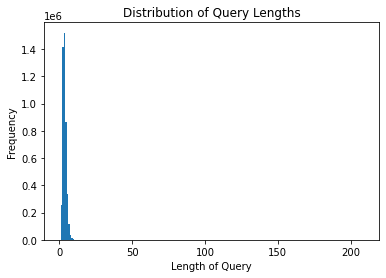

In [9]:
import matplotlib.pyplot as plt

bin_size = 1
bin_range = range(0, max(query_lens) + bin_size, bin_size)

# Plot the histogram
n, bins, patches = plt.hist(query_lens, bins=bin_range)

# labels and a title
plt.xlabel('Length of Query')
plt.ylabel('Frequency')
plt.title('Distribution of Query Lengths')

# Show the plot
plt.show()

In [10]:
# Print the frequency counts for each bin
print('Query Length\tFrequency')
for i in range(len(n)):
    print(f'{bins[i]}\t{n[i]}')

Query Length	Frequency
0	1.0
1	254647.0
2	1411221.0
3	1519506.0
4	861411.0
5	336884.0
6	112751.0
7	35281.0
8	11585.0
9	4282.0
10	1693.0
11	788.0
12	412.0
13	184.0
14	115.0
15	61.0
16	68.0
17	40.0
18	36.0
19	11.0
20	16.0
21	8.0
22	3.0
23	6.0
24	5.0
25	4.0
26	3.0
27	5.0
28	6.0
29	4.0
30	4.0
31	2.0
32	6.0
33	4.0
34	1.0
35	4.0
36	1.0
37	0.0
38	0.0
39	0.0
40	0.0
41	4.0
42	5.0
43	1.0
44	1.0
45	2.0
46	0.0
47	0.0
48	0.0
49	2.0
50	1.0
51	2.0
52	0.0
53	0.0
54	0.0
55	0.0
56	1.0
57	0.0
58	0.0
59	0.0
60	1.0
61	0.0
62	0.0
63	0.0
64	0.0
65	1.0
66	0.0
67	1.0
68	0.0
69	0.0
70	0.0
71	0.0
72	0.0
73	0.0
74	0.0
75	0.0
76	0.0
77	0.0
78	1.0
79	0.0
80	0.0
81	0.0
82	0.0
83	0.0
84	0.0
85	1.0
86	0.0
87	0.0
88	0.0
89	0.0
90	0.0
91	0.0
92	0.0
93	0.0
94	0.0
95	0.0
96	0.0
97	0.0
98	0.0
99	0.0
100	0.0
101	0.0
102	0.0
103	0.0
104	0.0
105	0.0
106	0.0
107	0.0
108	0.0
109	0.0
110	0.0
111	0.0
112	0.0
113	0.0
114	0.0
115	0.0
116	0.0
117	0.0
118	0.0
119	0.0
120	0.0
121	0.0
122	0.0
123	0.0
124	0.0
125	0.0
126	0.0
127	0.0
128

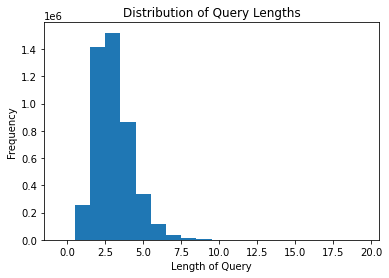

In [23]:
import matplotlib.pyplot as plt

bin_size = 1
bin_range = [i-0.5 for i in range(0, 21, bin_size)]

# Plot the histogram
n, bins, patches = plt.hist(query_lens, bins=bin_range)

# labels and a title
plt.xlabel('Length of Query')
plt.ylabel('Frequency')
plt.title('Distribution of Query Lengths')

# Show the plot
plt.show()

In [28]:
# Print the frequency counts for each bin
print('Query Length\tFrequency')
for i in range(len(n)):
    print(f'{bins[i]+0.5}\t\t{n[i]}')

Query Length	Frequency
0.0		1.0
1.0		254647.0
2.0		1411221.0
3.0		1519506.0
4.0		861411.0
5.0		336884.0
6.0		112751.0
7.0		35281.0
8.0		11585.0
9.0		4282.0
10.0		1693.0
11.0		788.0
12.0		412.0
13.0		184.0
14.0		115.0
15.0		61.0
16.0		68.0
17.0		40.0
18.0		36.0
19.0		11.0


In [34]:
# no. of queries
sum(n)

4550977.0

In [27]:
# average length of queries
sum([n[i]*i for i in range(len(n))])/sum(n)

3.045158435210725

#### Filtering the queries having length >= 20

In [5]:
with open('./wiki-vocab-only-aol-queries.txt', 'r') as f:
    clean_aol_queries = f.read().splitlines()

In [12]:
queries_with_lens = [(q, len(q.split())) for q in clean_aol_queries]

In [8]:
# filtering queries of length >= 20
final_aol_queries = [q for q,l in queries_with_lens if l < 20]

In [17]:
with open('final-aol-queries.txt', 'w') as f:
    f.write('\n'.join(final_aol_queries)+'\n')

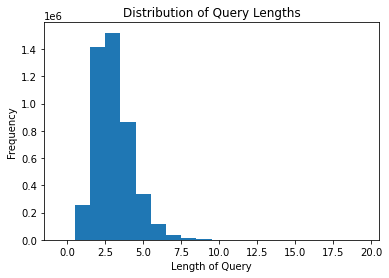

In [13]:
import matplotlib.pyplot as plt

query_lens = [l for _,l in queries_with_lens if l < 20]

bin_size = 1
bin_range = [i-0.5 for i in range(0, max(query_lens)+2, bin_size)]

# Plot the histogram
n, bins, patches = plt.hist(query_lens, bins=bin_range)

# labels and a title
plt.xlabel('Length of Query')
plt.ylabel('Frequency')
plt.title('Distribution of Query Lengths')

# Show the plot
plt.show()

In [14]:
# Print the frequency counts for each bin
print('Query Length\tFrequency')
for i in range(len(n)):
    print(f'{bins[i]+0.5}\t\t{n[i]}')

Query Length	Frequency
0.0		1.0
1.0		254647.0
2.0		1411221.0
3.0		1519506.0
4.0		861411.0
5.0		336884.0
6.0		112751.0
7.0		35281.0
8.0		11585.0
9.0		4282.0
10.0		1693.0
11.0		788.0
12.0		412.0
13.0		184.0
14.0		115.0
15.0		61.0
16.0		68.0
17.0		40.0
18.0		36.0
19.0		11.0


#### final-aol-queries to aol-queries-final.json

In [9]:
with open('./final-aol-queries.txt', 'r') as f:
    aol_queries = f.read().splitlines()

In [14]:
len(aol_queries)

4550977

In [13]:
import json
with open('./aol-queries-final.json', 'w') as f:
    json.dump(aol_queries, f)